## Convolutional Neural Networks and Computer Vision with TensorFlow

* Mostly Convolutional Neural Networks are used to analyze Images and based on the analysis make predictions.

* For Example:- Classify wither an image is of pizza or steak and detect wither a particular object appears in the image or not.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:07<00:00, 190MB/s]
100% 1.06G/1.06G [00:07<00:00, 145MB/s]


In [4]:
import zipfile

zif_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zif_ref.extractall('/content')
zif_ref.close()


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


### A little Tweeking

#### Generator: Divides the data into batches. Suppose you have 10,000 images so you do not work with all the images at once. You divide them into little batches and work with them.

In [13]:
# Generators image dataset from directory.

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
train_ds.class_names

In [16]:
# Normalize the data

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_dataset = validation_dataset.map(process)

In [26]:
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',
                 activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])


In [28]:
history=model.fit(train_ds, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 92ms/step - accuracy: 0.5472 - loss: 1.9855 - val_accuracy: 0.5484 - val_loss: 5.3141
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6285 - loss: 0.6454 - val_accuracy: 0.5904 - val_loss: 0.6500
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.6665 - loss: 0.6074 - val_accuracy: 0.6726 - val_loss: 0.6007
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.7355 - loss: 0.5267 - val_accuracy: 0.6876 - val_loss: 0.5999
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7716 - loss: 0.4863 - val_accuracy: 0.7836 - val_loss: 0.4736
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.8139 - loss: 0.3972 - val_accuracy: 0.7784 - val_loss: 0.4755
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.8654 - loss: 0.3106 - val_accuracy: 0.7658 - val_loss: 0.6159
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.9157 - loss: 0.2115 - 

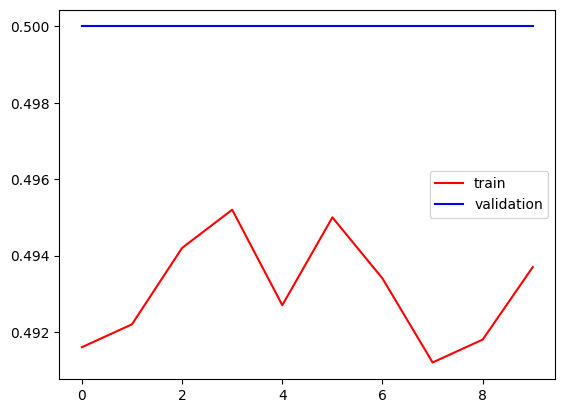

In [25]:
# Without Dropout and Batch Normalization
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


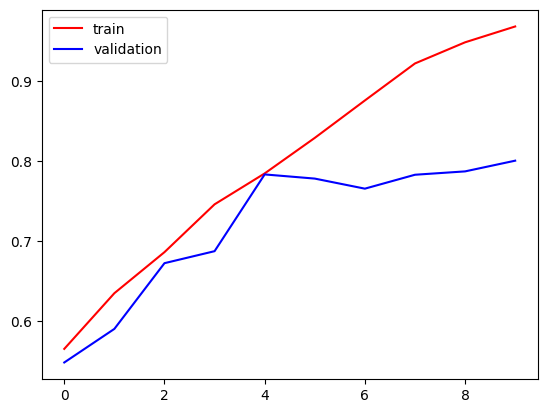

In [30]:
# With Dropout and Batch Normalization
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


#### Ways to improving Algorithms

* Add More Data
* Data Augmentation
* L1/L2 Regularizer
* Dropout
* Batch Normalization
* Reduce Complexity

In [31]:
import cv2

In [50]:
test_img = cv2.imread('/content/cat.png')

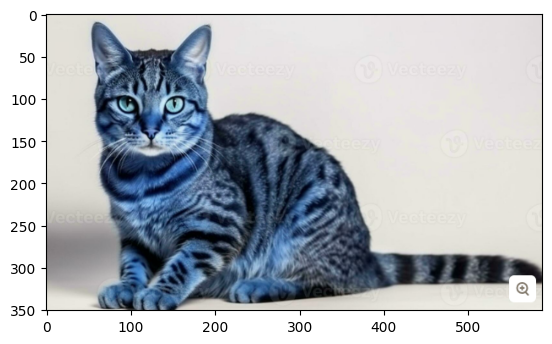

In [51]:
# Show the image
plt.imshow(test_img)

In [34]:
test_img.shape

(351, 588, 3)

In [52]:
test_img = cv2.resize(test_img,(256,256))

In [53]:
test_input = test_img.reshape((1,256,256,3))

In [54]:
predict =model.predict(test_input)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.]], dtype=float32)

In [55]:
if predict[0]==0:
  print("Dog")
else:
  print("Cat")

Cat


In [59]:
test_img = cv2.imread('/content/dog.png')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

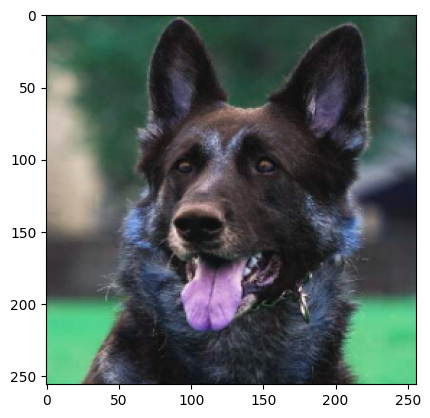

In [60]:
plt.imshow(test_img)

In [57]:
predict = model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [58]:
if predict[0]==0:
  print("Dog")
else:
  print("Cat")

Dog
